# DS-SF-30 | Unit Project 2: Exploratory Data Analysis

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

First, load the python libraries you will need for this project:

In [20]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import statsmodels.api as sm
import statsmodels.formula.api as smf

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

Then, read in your dataset:

In [2]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'dataset-ucla-admissions.csv'))

df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions

> ### Question 1.  How many observations are in our dataset?

In [3]:
df.shape[0]

400

Answer: There are 400 observations in the dataset,

> ### Question 2.  Create a summary table.

In [4]:
df.describe()

//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


> ### Question 3.  Why would `gre` have a larger variance than `gpa`?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1047d7630>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x117df7e10>]], dtype=object)

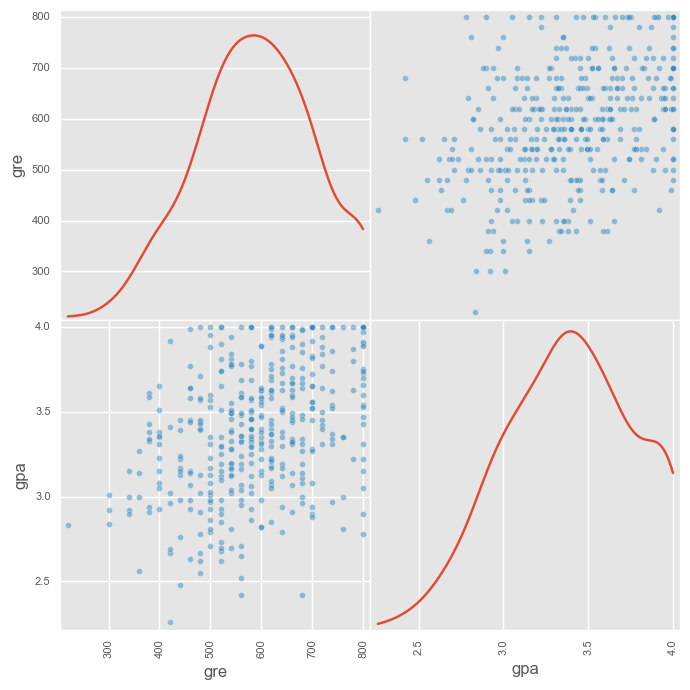

In [5]:
pd.tools.plotting.scatter_matrix(
    df[ ['gre', 'gpa'] ],
    diagonal = 'kde', s = 75, figsize = (8, 8)
)

In [6]:
unique_gre = df.gre.unique()
unique_gpa = df.gpa.unique()

print("Unique Values count for gre :",unique_gre.shape[0])
print("Unique Values count for gpa :",unique_gpa.shape[0])
print("Variance for gre :",df.gre.var())
print("Variance for gpa :",df.gpa.var())

Unique Values count for gre : 27
Unique Values count for gpa : 133
Variance for gre : 13369.953039758006
Variance for gpa : 0.14487948622204228


Answer: The datapoints spread for gpa is far greater than gre. Hence gre has a larger variance than gpa

> ### Question 4.  Drop data points with missing data.

In [7]:
df.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

In [8]:
df_no_nulls = df.dropna()

> ### Question 5.  Confirm that you dropped the correct data.  How can you tell?

In [9]:
df_no_nulls.shape

(397, 4)

Answer: The number of samples reduced to 397 from 400. Rows with null values have been dropped.

> ### Question 6.  Create boxplots for `gre` and `gpa`.

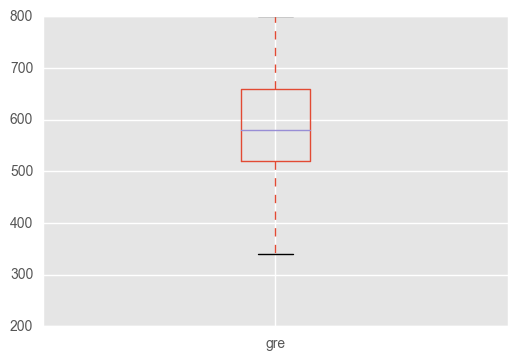

In [10]:
df[ ['gre'] ].plot(kind = 'box')

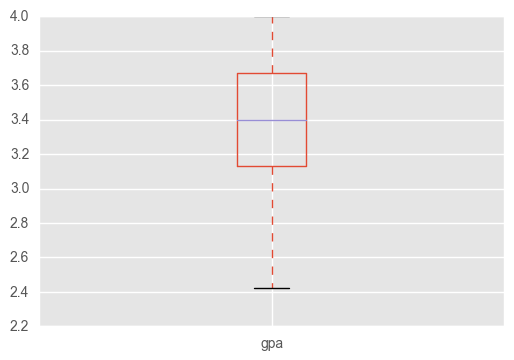

In [11]:
df[ ['gpa'] ].plot(kind = 'box')

> ### Question 7.  What do boxplots show?

Answer: gre data is spread between 340 and 800. The mean is more towards 340. gpa data is spread between 2.4 and 4.0. The mean is at 3.4 at the mid-point. There are no outliers.

> ### Question 8.  Plot the distribution of each variable.

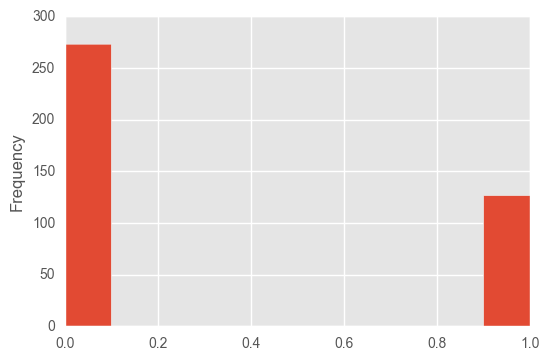

In [12]:
df.admit.plot(kind = 'hist')

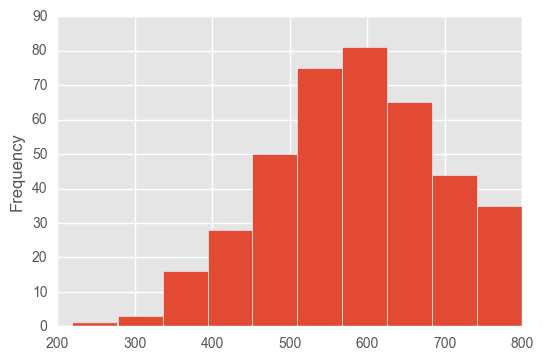

In [47]:
df.gre.plot(kind = 'hist')

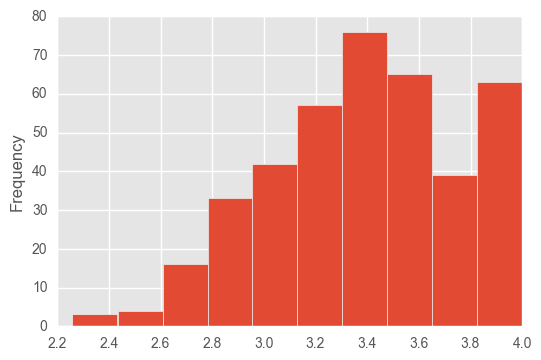

In [48]:
df.gpa.plot(kind = 'hist')

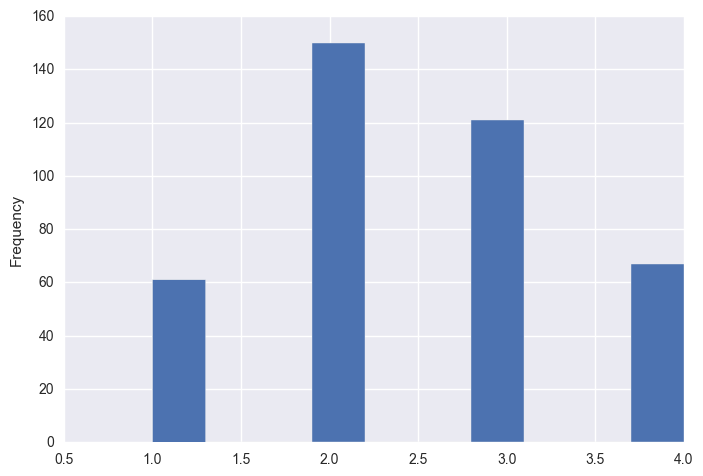

In [17]:
df.prestige.plot(kind = 'hist')

> ### Question 9.  If our model had an assumption of a normal distribution for `gre` and `gpa`, would we meet that requirement?  Would their distributions need correction?  If so, why, why not?  How?

In [21]:
model = smf.ols(formula = 'gre ~ gpa', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gre   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     67.66
Date:                Thu, 19 Jan 2017   Prob (F-statistic):           2.84e-15
Time:                        14:35:49   Log-Likelihood:                -2417.6
No. Observations:                 397   AIC:                             4839.
Df Residuals:                     395   BIC:                             4847.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    193.0449     48.299      3.997      0.000        98.089   288.001
gpa          116.3873     14.150      8.225      0.000        88.569   144.206
==============================================================================
Omnibus:                        1.159   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.560   Jarque-Bera (JB):                1.172
Skew:                          -0.045   Prob(JB):                        0.557
Kurtosis:                       2.749   Cond. No.                         33.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
model.resid.mean()

-3.6941063138761885e-14

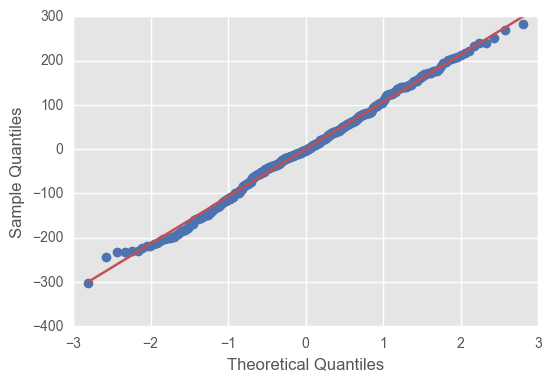

In [23]:
sm.qqplot(model.resid, line = 's')

pass

Answer: Yes, we would meet the requirement if gre and gpa have a normal distribution. From the plot above the points fall on the reference line which is a normal distribution.

> ### Question 10.  Create a correlation matrix for the dataset

In [42]:
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


> ### Question 11.  What did you find?  Which of our variables are potentially colinear?

Answer: gre and gpa are potentially colinear. If the colinearity increases, we cannot use gre and gpa simultaneously

> ### Question 12.  Write an analysis plan for exploring the association between graduate school admission rates and prestige of undergraduate schools.

Answer: Determining the colinearity of the variables suggests its impact on fitting the right model on the dataset. Prestige has a negative correlation on admission rate but its a weak correlation. Including gre or gpa along with prestige could improve the predictive model. A combination of forward and backward regression modeling would give an insight into the association between graduate school admission rates and prestige of undergraduate schools. 

> ### Question 13.  What is your hypothesis?

Answer: Using graduate school admission rates and prestige along with gre or gpa scores will help in predicting the cutoff scores for UCLA admissions.